Definim algunes constants:

In [31]:

import os
import numpy as np
import copy

class SnowmanConstants:
    """CONSTANTS FOR CELL IDENTIFICATION"""
    WALL_CELL = 0
    OUT_OFF_GRID_CELL = 0
    SMALL_BALL_CELL = 1
    MEDIUM_BALL_CELL = 2
    SMALL_BALL_ON_MEDIUM_BALL_CELL= 3
    LARGE_BALL_CELL = 4
    SMALL_BALL_ON_LARGE_BALL_CELL = 5
    MEDIUM_BALL_ON_LARGE_BALL_CELL = 6
    FULL_SNOW_MAN_CELL= 7
    GRASS_CELL = 8
    SNOW_CELL = 9
    CHARACTER_ON_SNOW_CELL = 10
    CHARACTER_ON_GRASS_CELL = 11

    """CONSTANTS FOR TOKEN IDENTIFICATION"""
    WALL_TOKEN = '#'
    OUT_OFF_GRID_TOKEN = 'x'
    SMALL_BALL_TOKEN = '1'
    MEDIUM_BALL_TOKEN = '2'
    SMALL_BALL_ON_MEDIUM_BALL_TOKEN = '3'
    LARGE_BALL_TOKEN = '4'
    SMALL_BALL_ON_LARGE_BALL_TOKEN = '5'
    MEDIUM_BALL_ON_LARGE_BALL_TOKEN = '6'
    FULL_SNOW_MAN_TOKEN= '7'
    GRASS_TOKEN = ','
    SNOW_TOKEN = '.'
    CHARACTER_ON_SNOW_TOKEN = 'p'
    CHARACTER_ON_GRASS_TOKEN = 'q'
    CHARACTER_LEAVE_CELL = 'pq'

    """DEFINE REWARDS"""
    error=-100
    tonto=-50
    cami=1
    cim=100
    convertir=5
    bingo=400
    arrastra=10

    actions=[
        #me->wall->wall         me->wall->small         me->wall->medium       me->wall->sm_on_md     me->wall->large       me->wall->sm_on_lg     me->wall->md_on_lg     me->wall->snowman       me->wall->grass         me->wall->snow          
        [[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error]],
         #me->small->wall        me->small->small      me->small->medium   me->small->sm_on_md     me->small->large  me->small->sm_on_lg   me->small->md_on_lg   me->small->snowman      me->small->grass   me->small->snow          
        [[None,None,None,error],[None,None,None,tonto],['pq', 11, 3, cim],[None,None,None,tonto],['pq', 11, 5, cim],[None,None,None,tonto],['pq', 11, 7, bingo],[None,None,None,tonto],['pq', 11, 1, arrastra],['pq',11,2,convertir]],
        #me->medium->wall        me->medium->small      me->medium->medium   me->medium->sm_on_md     me->medium->large  me->medium->sm_on_lg   me->medium->md_on_lg   me->medium->snowman   me->medium->grass  me->medium->snow          
        [[None,None,None,error],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],['pq',11, 6,cim],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],['pq',11,2,arrastra],['pq',11,4,convertir]],
        #me->sm_md->wall        me->sm_md->small      me->sm_md->medium       me->sm_md->sm_on_md     me->sm_md->large     me->sm_md->sm_on_lg    me->sm_md->md_on_lg     me->sm_md->snowman     me->sm_md->grass me->sm_md->snow          
        [[None,None,None,error],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],[None,2,1,-cim], [ None,2,2,-cim]],
        #me->large->wall        me->large->small       me->large->medium       me->large->sm_on_md    me->large->large      me->large->sm_on_lg    me->large->md_on_lg     me->large->snowman    me->large->grass    me->large->snow          
        [[None,None,None,error],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],['pq',11, 4, arrastra],['pq',11,4,arrastra]],
        #me->sm_on_lg->wall      me->sm_on_lg->small    me->sm_on_lg->medium   me->sm_on_lg->sm_on_md    me->sm_on_lg->large   me->sm_on_lg->sm_on_lg  me->sm_on_lg->md_on_lg    me->sm_on_lg->snowman  me->sm_on_lg->grass   me->sm_on_lg->snow          
        [[None,None,None,error],[None,None,None,tonto],[None,None,None,tonto],[None, None, None, tonto],[None,None,None,tonto],[None,None,None, tonto ], [None,None,None,tonto],[None,None,None,tonto],[None,  4, 1, -cim ], [None, 4, 2, -cim]],
        #me->md_on_lg->wall      me->md_on_lg->small   me->md_on_lg->medium   me->md_on_lg->sm_on_md  me->md_on_lg->large   me->md_on_lg->sm_on_lg  me->md_on_lg->md_on_lg  me->md_on_lg->snowman  me->md_on_lg->grass   me->md_on_lg->snow          
        [[None,None,None,error],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto],[None,None,None,tonto], [None,None,None,tonto],  [None,None,None,tonto],[None,4,2,-cim],[None,4,4,-cim]],   
        #me->snowman->wall      me->snowman->small     me->snowman->medium   me->snowman->sm_on_md  me->snowman->large     me->snowman->sm_on_lg  me->snowman->md_on_lg   me->snowman->snowman   me->snowman->grass     me->snowman->snow          
        [[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error],[None,None,None,error]],
        #me->grass->wall      me->grass->small     me->grass->medium   me->grass->sm_on_md  me->grass->large  me->grass->sm_on_lg  me->grass->md_on_lg  me->grass->snowman   me->grass->grass     me->grass->snow          
        [['pq',11,None,cami],['pq',11,None,cami],['pq',11,None,cami],['pq',11,None,cami],['pq',11,None,cami], ['pq',11,None,cami], ['pq',11,None,cami],['pq',11,None,cami],['pq',11,None,cami],['pq',11,None,cami]],
        #me->snow->wall      me->snow->small       me->snow->medium   me->snow->sm_on_md  me->snow->large     me->snow->sm_on_lg  me->snow->md_on_lg  me->snow->snowman    me->snow->grass     me->snow->snow          
        [['pq',10,None,cami],['pq',10,None,cami],['pq',10,None,cami],['pq',10,None,cami],['pq',10,None,cami],['pq',10,None,cami],['pq',10,None,cami],['pq',10,None,cami],['pq',10,None,cami],['pq',10,None,cami]]
    ]

    @staticmethod
    def get_cell_codes_array():
        return [
            SnowmanConstants.WALL_CELL,
            SnowmanConstants.OUT_OFF_GRID_CELL,
            SnowmanConstants.SMALL_BALL_CELL,
            SnowmanConstants.MEDIUM_BALL_CELL,
            SnowmanConstants.SMALL_BALL_ON_MEDIUM_BALL_CELL,
            SnowmanConstants.LARGE_BALL_CELL,
            SnowmanConstants.SMALL_BALL_ON_LARGE_BALL_CELL,
            SnowmanConstants.MEDIUM_BALL_ON_LARGE_BALL_CELL,
            SnowmanConstants.FULL_SNOW_MAN_CELL,
            SnowmanConstants.GRASS_CELL,
            SnowmanConstants.SNOW_CELL,
            SnowmanConstants.CHARACTER_ON_SNOW_CELL,
            SnowmanConstants.CHARACTER_ON_GRASS_CELL
        ]
    
    @staticmethod
    def get_tokens_array():
        return [
            SnowmanConstants.WALL_TOKEN,
            SnowmanConstants.OUT_OFF_GRID_TOKEN,
            SnowmanConstants.SMALL_BALL_TOKEN,
            SnowmanConstants.MEDIUM_BALL_TOKEN,
            SnowmanConstants.SMALL_BALL_ON_MEDIUM_BALL_TOKEN,
            SnowmanConstants.LARGE_BALL_TOKEN,
            SnowmanConstants.SMALL_BALL_ON_LARGE_BALL_TOKEN,
            SnowmanConstants.MEDIUM_BALL_ON_LARGE_BALL_TOKEN,
            SnowmanConstants.FULL_SNOW_MAN_TOKEN,
            SnowmanConstants.GRASS_TOKEN,
            SnowmanConstants.SNOW_TOKEN,
            SnowmanConstants.CHARACTER_ON_SNOW_TOKEN,
            SnowmanConstants.CHARACTER_ON_GRASS_TOKEN
        ]




        

Definim l'environment:

In [32]:
import gym
from gym import spaces

class SnowmanEnvironment(gym.Env):

    ENCODED_TEXT_MODE = 0
    DECODED_TEXT_MODE = 1
    GRAPHIC_MODE = 2 #futur, encara no implementat

    def __init__(self, map_file, n, m):
        super(SnowmanEnvironment, self).__init__()
        self.n = n
        self.m = m
        self.map, self.decoded_map = self._read_and_encode_map(map_file, n, m)
        self.original_map = copy.deepcopy(self.map) #Conserve the original map to allow reset
        
        
        #Search the agent position
        for i in range(n):
            for (j) in range(m):
                if (self.map[i,j] == SnowmanConstants.CHARACTER_ON_SNOW_CELL or 
                    self.map[i,j] == SnowmanConstants.CHARACTER_ON_GRASS_CELL):
                    self.agent_position = (i, j)
                    break
        self.original_agent_position = copy.deepcopy(self.agent_position)

        #Atributs necessaris per gym:
        self.action_space = spaces.Discrete(4)
        
        self.observation_space = spaces.Box(low=0, high=255, shape=(n, m), dtype=np.float64)


    def reset(self):
        self.map = copy.deepcopy(self.original_map)
        self.agent_position = copy.deepcopy(self.original_agent_position)
        return self.map, { "Agent position" : self.agent_position}

    def step(self,action): # action = 0 dreta, 1 baix, 2 esquerra, 3 dalt
        a, b = self.agent_position
        is_agent_on_snow = self.map[a,b] == SnowmanConstants.CHARACTER_ON_SNOW_CELL       

        
        
        inc=[[0,1,0,-1],[1,0,-1,0]]
        next_cell=[a+inc[0][action],b+inc[1][action]] #seguent posició segons l'acció a realitzar
        next_of_next_cell=[a+2*inc[0][action],b+2*inc[1][action]] #seguent de la seguent posició segons l'acció a realitzar

        mov=SnowmanConstants.actions[int(self.map[next_cell[0],next_cell[1]])][int(self.map[next_of_next_cell[0],next_of_next_cell[1]])] #busca a la matri d'acions segons el que hi ha a la posició seguent i la seguent de la seguent
        reward=mov[3] # la tercera psosició es la recompensa
        mov=mov[:3] # les tres primeres posicions son que hem de col.locar a la posició del jugador, la posició seguent i la posició seguent de la seguent
        
        for i,aux in enumerate(mov):
            if aux!=None:
                if aux==SnowmanConstants.CHARACTER_LEAVE_CELL:
                    if is_agent_on_snow:
                        f=SnowmanConstants.SNOW_CELL
                    else:
                        f=SnowmanConstants.GRASS_CELL
                else:
                    f=int(aux)

                if i==0:
                    self.map[a,b]=f
                elif i==1:
                    self.map[next_cell[0],next_cell[1]]=f
                else:
                    self.map[next_of_next_cell[0],next_of_next_cell[1]]=f
        if reward==SnowmanConstants.bingo: #or reward<=SnowmanConstants.tonto:
            done=True
        else:
            done=False

        if mov[0] != None:
            if action == 0:
                b = b + 1
            elif action == 1:
                a = a + 1
            elif action == 2:
                b = b - 1
            elif action == 3:
                a = a - 1
            if self.map[a,b] != SnowmanConstants.OUT_OFF_GRID_CELL and self.map[a,b] != SnowmanConstants.WALL_CELL:
                self.agent_position = (a, b)
                #print(self.agent_position)


        return self.map,reward,done, {}


    def _read_and_encode_map(self,file,n,m):
        tokens='x#,.qp1234567'
        replace_tokens=[0,0,8,9,11,10,1,2,3,4,5,6,7]
        f = open(file, "r")
        decoded_map = np.empty((n, m), dtype=np.str_)
        encoded_map = np.zeros((n,m))
        for row,linea in enumerate(f):
            linea=linea.rstrip('\n\r\t')
            for column,car in enumerate(linea):
                res = tokens.find(car)
                encoded_map[row,column]=replace_tokens[res]
                decoded_map[row, column] = car
                
        f.close()
        return encoded_map, decoded_map
    
    def show_map(self, mode):
        if mode == self.ENCODED_TEXT_MODE:
            print(self.map)
        elif mode == self.DECODED_TEXT_MODE:
            tokens = SnowmanConstants.get_cell_codes_array()
            tokens_to_replace = SnowmanConstants.get_tokens_array()
            decoded_map = copy.deepcopy(self.decoded_map)
            for i in range(self.n):
                for j in range(self.m):
                    if self.map[i,j] != SnowmanConstants.WALL_CELL or self.map[i,j] != SnowmanConstants.OUT_OFF_GRID_CELL:
                        index = tokens.index(self.map[i,j])
                        decoded_map[i,j] = tokens_to_replace[index]
            print(decoded_map)

    def split_map_layers(self, state):
        transform=[[0],[4],[5],[4,5],[6],[4,6],[5,6],[4,5,6],[2],[1],[1,3],[2,3]]
        splitted_map=np.zeros((self.n, self.m, 7))
        for i in range(self.n):
            for j in range(self.m):
                for k in transform[int(state[i][j])]:
                    splitted_map[i,j,k]=1
        return splitted_map

                    



Necessitem un replay buffer que guardi les transicions (estat, accio, seguent estat, recompensa). Definim un nou tipus Transition per fer-ho:


In [33]:
from collections import namedtuple, deque
import random

Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))

class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

Activem el càlcul amb GPU i definim la xara DQN neuronal convolucional.

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

plt.ion()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("The model will be trained with", device)

The model will be trained with cuda


In [35]:
class DQN(nn.Module):

    def __init__(self, layers, n_actions, n, m):
        super(DQN, self).__init__()
        #conv layers params: in_channels, out_channels, kernel_size, padding=0,
        self.conv1 = nn.Conv2d(layers, 6, 3, padding=1) 
        self.conv2 = nn.Conv2d(6, 12, 3, padding=1)
        self.linear1 = nn.Linear(12*n*m, 64)
        self.linear2 = nn.Linear(64, n_actions)

    def forward(self, x):
        x = x.permute(0, 3, 1, 2)
        #print(x.shape)
        x = F.relu(self.conv1(x))
        #print(x.shape)
        x = F.relu(self.conv2(x))
        #print(x.shape)
        x = torch.flatten(x, 1)
        #print(x.shape)
        x = F.relu(self.linear1(x))
        #print(x.shape)
        x = F.softmax(self.linear2(x),  dim=1)

        return x

Definim alguns hiperparametres i llavors per fer reproduible les proves:

In [36]:
np.random.seed(13)
torch.manual_seed(13)

map_rows=8
map_cols=8

BATCH_SIZE = 1024 #mida del batch del replay
GAMMA = 0.99 #factor de descompte de les recompeses futures
EPS_START = 0.9 #valor inicial de la epsilon per la epsilon greedy policy
EPS_END = 0.05 #valor final de la epsilon per la epsilon greedy policy
EPS_DECAY = 40000 #controla la caiguda expoencial del valor epsilon, com més alt, mes lent disminueix
TAU = 0.005 #controla cada quan s'actualitza la target network
LR = 1e-4 #Learning rate de l'optimitzador

#Registrem l'environment al gym per poder utilitzar el mètodes de la superclase. Pot ser útil per render i algunes implementacions.
#Per exemple el baseline pot executar algorismes amb environments personalitzats sempre que implementin alguns mètodes de gym. 

gym.register(
    id='Snowman-v1.0',
    entry_point='__main__:SnowmanEnvironment',
)

snowman_gym_env = gym.make('__main__:Snowman-v1.0', map_file='./Dades/adam.txt', n=7, m=7)

In [37]:



snowman_env = SnowmanEnvironment('./Dades/adam.txt', map_rows, map_cols)
print("***************************ENCODED MAP****************************")
snowman_env.show_map(SnowmanEnvironment.ENCODED_TEXT_MODE)
print("\n")
print("***************************DECODED MAP****************************")
snowman_env.show_map(SnowmanEnvironment.DECODED_TEXT_MODE)
print("\n")

n_actions =snowman_gym_env.action_space.n
print(n_actions)

state, info = snowman_gym_env.reset()





***************************ENCODED MAP****************************
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  9.  9.  9.  9.  9.  0.  0.]
 [ 0.  9.  0.  8.  0.  9.  0.  0.]
 [ 0.  9.  1.  1.  1.  9.  0.  0.]
 [ 0.  9.  0. 11.  0.  9.  0.  0.]
 [ 0.  9.  9.  9.  9.  9.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


***************************DECODED MAP****************************
[['#' '#' '#' '#' '#' '#' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '.' '#' ',' '#' '.' '#' '']
 ['#' '.' '1' '1' '1' '.' '#' '']
 ['#' '.' '#' 'q' '#' '.' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '#' '#' '#' '#' '#' '#' '']
 ['' '' '' '' '' '' '' '']]


4


Creem les dues xarxes neuronals i el replay memory:

In [38]:
import math

class TrainingAgent:
    def __init__(self, policy_net, target_net, optimizer, replay_memory):
        self.policy_net = policy_net
        self.target_net = target_net
        self.replay_memory = replay_memory
        self.steps_done = 0
        self.optimizer = optimizer

    
    def select_action_epsilon_greedy(self, state, environment):
        sample = random.random()
        eps_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * self.steps_done / EPS_DECAY)
        self.steps_done = self.steps_done+1
        if sample > eps_threshold:
            with torch.no_grad():
                return self.policy_net(state).max(1).indices.view(1, 1)
        else:
            return torch.tensor([[environment.action_space.sample()]], device=device, dtype=torch.long)
        
    def training_step(self):
        #Només entrenem si tenim suficients experiències al replay buffer
        if len(self.replay_memory) < BATCH_SIZE:
           return

        #Agafem un conjunt d'experiències aleatories:
        transitions = self.replay_memory.sample(BATCH_SIZE)

        #Tal i com descriu el llibre, necessitem un array per cada camp (array de estats, array de accions, array de seguents estats)
        #La seguent instrucció ho fa automàticament.
        batch = Transition(*zip(*transitions))

        #No ens interessen els estats finals (quan acaba el joc) per tant els filtrem
        non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), device=device, dtype=torch.bool)
        non_final_next_states = torch.cat([s for s in batch.next_state if s is not None])


        state_batch = torch.cat(batch.state)
        action_batch = torch.cat(batch.action)
        reward_batch = torch.cat(batch.reward)

        #Calculem els Q-valors del model online de cada parella estat-accio. Per a cada estat només ens interessa les accions que s'han realitzat,
        #per tant els obtenim amb gather:
        state_action_values = self.policy_net(state_batch).gather(1, action_batch)

        #Calculem els Q-valors dels estats següents que calcula la nostra xarxa. Ho fem amb la target net (variant DQN WITH FIXED Q-VALUE TARGETS)
        next_state_values = torch.zeros(BATCH_SIZE, device=device)
        with torch.no_grad():
            #L'unic que fa el seguent es que si es un estat final es queda tal qual (q-valor = 0). Si no ho és, guardem els q-valors esperats.
            next_state_values[non_final_mask] = self.target_net(non_final_next_states).max(1).values

            #Calculem els valors esperats segons la fòrmula:
            expected_state_action_values = (next_state_values * GAMMA) + reward_batch

        #Finalment calculem la pèrdua a partir dels q-valors que ens ha predit la xarxa i els q-valors esperats segons la fòrmula am Huber Loss
        criterion = nn.SmoothL1Loss()
        loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

        self.optimizer.zero_grad()
        loss.backward()

        #Capem els valors dels gradients per evitar el exploding gradient
        torch.nn.utils.clip_grad_value_(self.policy_net.parameters(), 100)
        self.optimizer.step()          



        return state_batch


        
        

        

        



In [39]:
policy_net = DQN(7, n_actions, map_rows, map_cols).to(device)
target_net = DQN(7, n_actions, map_rows, map_cols).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)

memory = ReplayMemory(50000)

training_agent = TrainingAgent(policy_net, target_net, optimizer, memory)

MAIN TRAINING LOOP

In [40]:
episodes=10000
jugades=1000
rewards = []
best_score = -100000

for episode in range(episodes):
    state, info = snowman_env.reset()
    #Convertim l'estat a un tensor. Fem unsqueeze perquè la xarxa neuronal s'espera un batch de mapes, i state es un sol mapa.
    #Per tant li passem un batch de un sol mapa encapsulant en un array (o tensor)

    #Separem les capes de l'estat (mapa) en una capa per cada tipus de casella:
    state = snowman_env.split_map_layers(state)

    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    act_rewards = []
    nJuagades = 0
    for jugada in range(jugades):
        nJuagades = nJuagades+1
        #Triem una accio segons la politica epsilon greedy
        action = training_agent.select_action_epsilon_greedy(state, snowman_env)
        next_state, reward, done, _ = snowman_env.step(action.item())
        act_rewards.append(reward)
        if reward >= best_score: # Not shown
            best_score = reward # Not shown

        #Conevrtim el reward a un tensor i el seguent state a un tensor, aixi ho guardem al replay_memory tot en tensors:
        reward = torch.tensor([reward], device=device)
        if done:
            next_state = None
        else:
            next_state = torch.tensor(snowman_env.split_map_layers(next_state), dtype=torch.float32, device=device).unsqueeze(0)

        
        training_agent.replay_memory.push(state,action, next_state, reward)

        #Anem al seguent estat
        state = next_state

        #OPTIMIZATION
        training_agent.training_step()
        


        #Soft update: Quan actualitzem els pesos, actualitzem el TAU % del pes enlloc de 
        #copiar totalment el pes de cada parametre per evitar variacions massives i millorar la estabilitat:
        target_net_state_dict = training_agent.target_net.state_dict()
        policy_net_state_dict = training_agent.policy_net.state_dict()

        #per tant iterem per cada pes de la xarxa que volem actualitzar, i fem que el seu pes sigui un cert
        # percentatge (TAU) de la xarxa objectiu més el restant (1-TAU) de la seva pròpia. Si TAU és 0.01,
        #copia el 1% del pes de l'objectiu i conserva l'altre 99%
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
            target_net.load_state_dict(target_net_state_dict)
        print("epsilon: ",EPS_END + (EPS_START - EPS_END) * math.exp(-1. * training_agent.steps_done / EPS_DECAY))
        snowman_env.show_map(SnowmanEnvironment.DECODED_TEXT_MODE)
        if done:
            break
    rewards.append(sum(act_rewards))
    if episode % 100 == 0:
        eps = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * training_agent.steps_done / EPS_DECAY)
        print("\rEpisode: {}, jugades {}, total_score: {} , score: {}, best_score: {} eps: {:.3f}    \n".format(episode, nJuagades, sum(act_rewards), act_rewards, best_score, eps), end="")
        snowman_env.show_map(SnowmanEnvironment.DECODED_TEXT_MODE)

            



epsilon:  0.8999787502656228
[['#' '#' '#' '#' '#' '#' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '.' '#' ',' '#' '.' '#' '']
 ['#' '.' '1' '1' '1' '.' '#' '']
 ['#' '.' '#' 'q' '#' '.' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '#' '#' '#' '#' '#' '#' '']
 ['' '' '' '' '' '' '' '']]
epsilon:  0.8999575010624823
[['#' '#' '#' '#' '#' '#' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '.' '#' '1' '#' '.' '#' '']
 ['#' '.' '1' 'q' '1' '.' '#' '']
 ['#' '.' '#' ',' '#' '.' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '#' '#' '#' '#' '#' '#' '']
 ['' '' '' '' '' '' '' '']]
epsilon:  0.8999362523905653
[['#' '#' '#' '#' '#' '#' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '.' '#' '1' '#' '.' '#' '']
 ['#' '.' '1' ',' '1' '.' '#' '']
 ['#' '.' '#' 'q' '#' '.' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '#' '#' '#' '#' '#' '#' '']
 ['' '' '' '' '' '' '' '']]
epsilon:  0.8999150042498584
[['#' '#' '#' '#' '#' '#' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '.' '#' '1' 

epsilon:  0.8984925882237256
[['#' '#' '#' '#' '#' '#' '#' '']
 ['#' 'p' '.' '.' '.' '.' '#' '']
 ['#' '.' '#' '1' '#' '.' '#' '']
 ['#' '.' ',' '1' '1' '.' '#' '']
 ['#' '.' '#' ',' '#' '.' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '#' '#' '#' '#' '#' '#' '']
 ['' '' '' '' '' '' '' '']]
epsilon:  0.8984713761741717
[['#' '#' '#' '#' '#' '#' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' 'p' '#' '1' '#' '.' '#' '']
 ['#' '.' ',' '1' '1' '.' '#' '']
 ['#' '.' '#' ',' '#' '.' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '#' '#' '#' '#' '#' '#' '']
 ['' '' '' '' '' '' '' '']]
epsilon:  0.8984501646549125
[['#' '#' '#' '#' '#' '#' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '.' '#' '1' '#' '.' '#' '']
 ['#' 'p' ',' '1' '1' '.' '#' '']
 ['#' '.' '#' ',' '#' '.' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '#' '#' '#' '#' '#' '#' '']
 ['' '' '' '' '' '' '' '']]
epsilon:  0.8984289536659346
[['#' '#' '#' '#' '#' '#' '#' '']
 ['#' '.' '.' '.' '.' '.' '#' '']
 ['#' '.' '#' '1' 

KeyboardInterrupt: 

MOSTREM ELS RESULTATS (REWARDS)

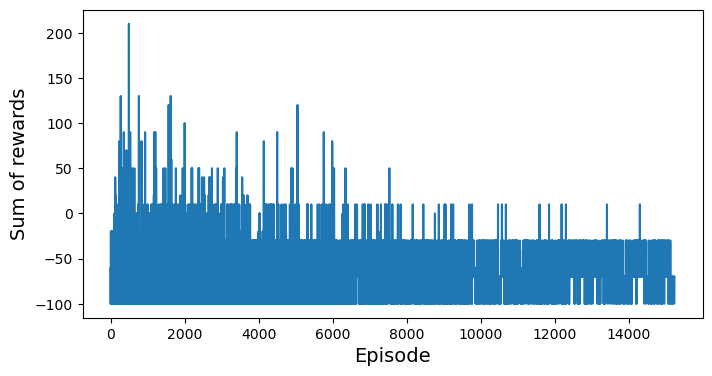

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
#save_fig("dqn_rewards_plot")
plt.show()